In [1]:
import os
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'orly.settings.dev')

import django
django.setup()

In [13]:
from django.conf import settings
from django.http import HttpResponse
from django.shortcuts import render, redirect
from PIL import Image, ImageFont, ImageDraw
from cover.utils import COLOR_CODES

from IPython.display import Image as DisplayImage

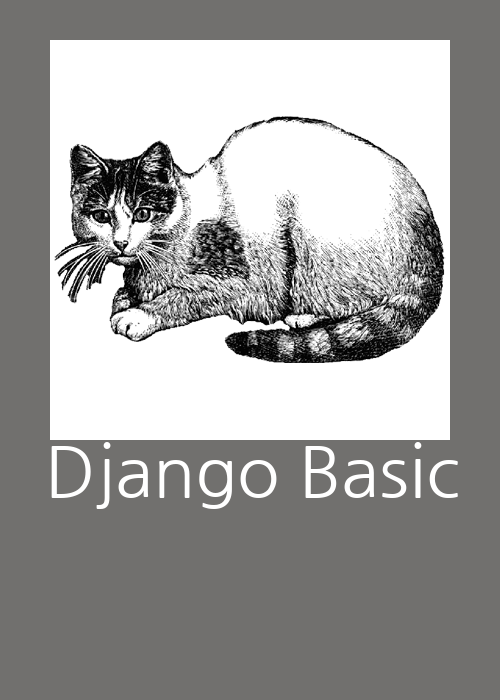

In [26]:
def image_generator(data):
    title = data['title']
    top_text = data['top_text']
    author = data['author']
    animal_code = data['animal_code']
    color_index = data['color_code']
    guide_text = data['guide_text']
    guide_text_placement = data['guide_text_placement']

    animal_path = settings.ROOT('assets', 'animal', '{}.png'.format(animal_code))
    animal_im = Image.open(animal_path)
    animal_im = animal_im.resize((400,400))

    color = COLOR_CODES[int(color_index)]

    canvas_im = Image.new('RGB', (500, 700), color)
    
    # Guide 이미지
    sample_im = Image.open('rly-sample.png')
    canvas_im.paste(sample_im, (0, 0))
    canvas_im.paste(animal_im, (50, 40))
    
#     canvas_im.paste(animal_im, (0, 0)) # left, top 지정

    ttf_path = settings.ROOT('assets', 'fonts', 'NanumGothic.ttf')
    draw = ImageDraw.Draw(canvas_im)

    fnt = ImageFont.truetype(ttf_path, 70)
    draw.text((45, 430), title, font=fnt, fill=(255,255,255,255))

#     fnt = ImageFont.truetype(ttf_path, 20)
#     draw.text((10, 60), top_text, font=fnt, fill=(0,255,0,255))

#     fnt = ImageFont.truetype(ttf_path, 60)
#     draw.text((10, 110), author, font=fnt, fill=(0, 255, 0, 255))
    response = HttpResponse(content_type='image/png')
    canvas_im.save(response, format='PNG')
    return response

r = image_generator({
    'title': 'Django Basic',
    'top_text': 'Powered by Python3',
    'author': 'askdjango',
    'animal_code': '2',
    'color_code': '1',
    'guide_text': 'Python Study!!',
    'guide_text_placement': 'bottom_right',
})
DisplayImage(r.getvalue())